# 🍷 Wine class prediction based on it's chemical properties

Using machine learning techniques like `Support Vector Machines (SVM)`, and `K-Nearest Neighbors`, predict the wine cultivars (type of grapes), based on `13` features. These features are the chemical properties of the wine.


## 📚 Libraries


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import joblib

## 📂 Load the dataset


In [2]:
wine = load_wine(as_frame=True)
wine_df = wine.frame

In [3]:
# first few records

wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
# last few records

wine_df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [5]:
# target classes

wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [6]:
# number of records, number of features

wine_df.shape

(178, 14)

In [7]:
# overall description of all features

wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [8]:
# feature names

wine_df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [9]:
# number of samples for each target label

wine_df.target.value_counts().sort_index()

target
0    59
1    71
2    48
Name: count, dtype: int64

## 🔥 Correlation Heatmap


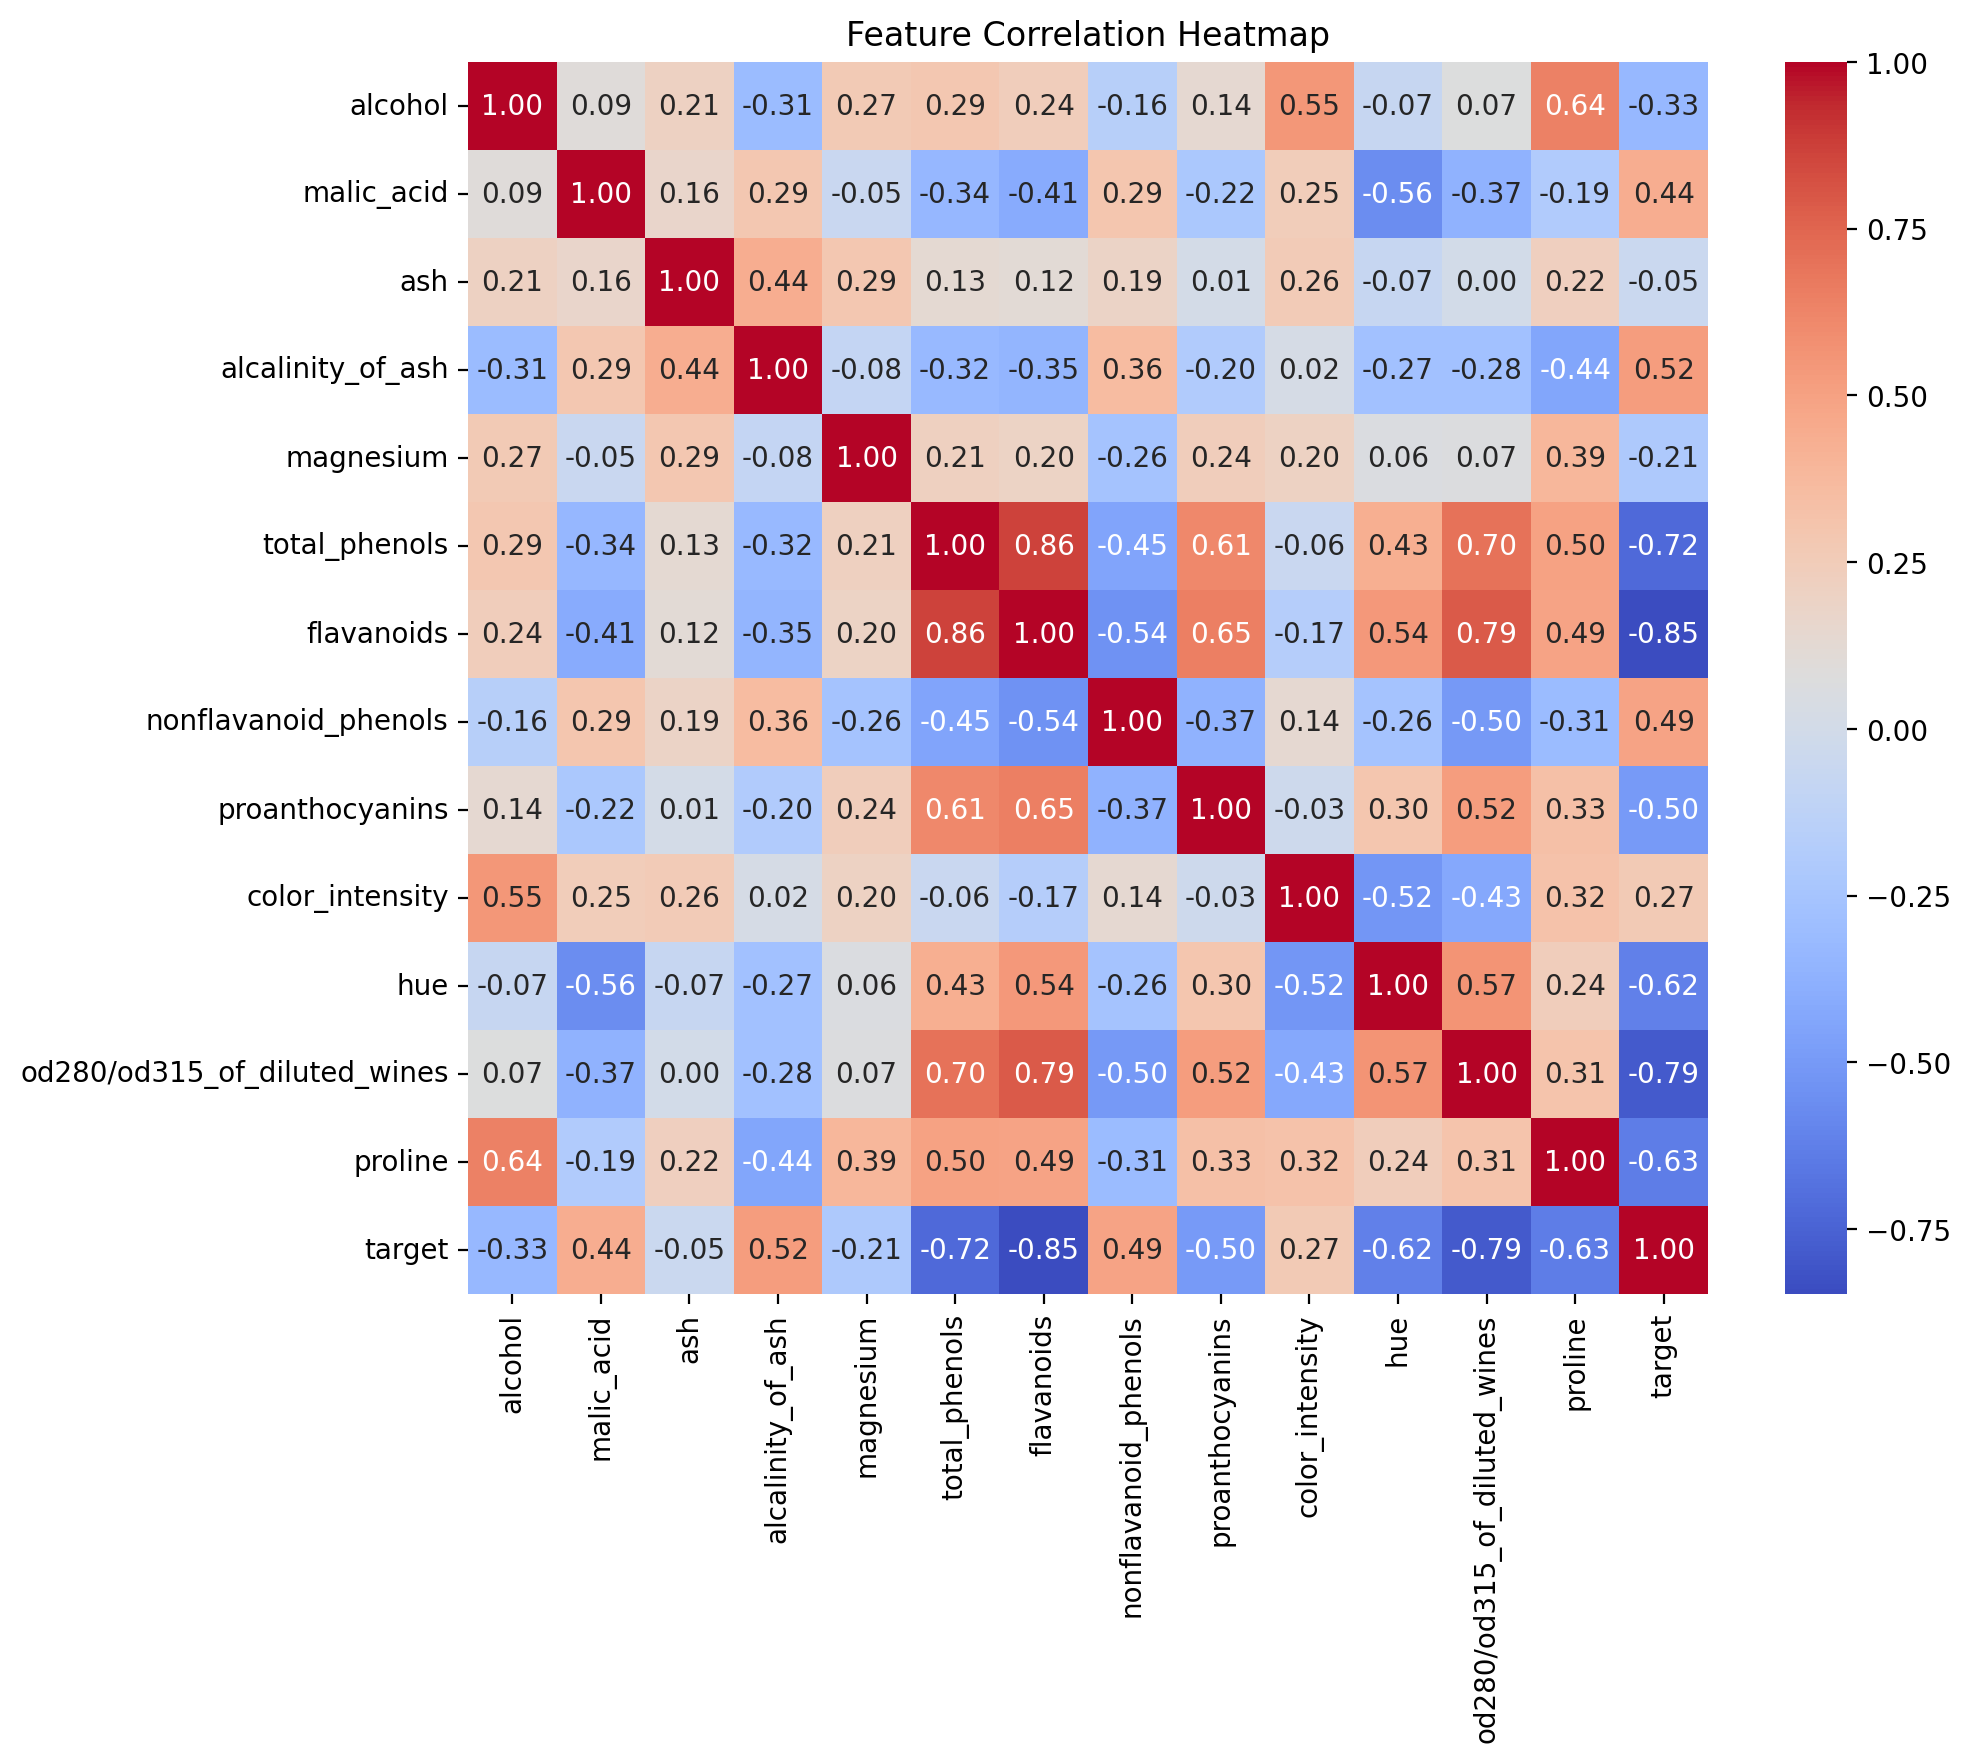

In [10]:
plt.figure(figsize=(10, 8), dpi=200)

sns.heatmap(data=wine_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Feature Correlation Heatmap")

plt.show()

## 🧹 Data Cleaning

We will check if there are any duplicate and null values, and if we find any, we'll remove them.


In [11]:
# any missing values?

wine_df.isna().values.any()

False

In [12]:
# any duplicate values?

wine_df.duplicated().values.any()

False

There are no missing or duplicate values, so we can move forward


## 🔷 Splitting into train and test data


In [13]:
X = wine_df.drop("target", axis=1)
y = wine_df.target

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 🤖 Train the models


In [15]:
models = {"svm": SVC(), "knn": KNeighborsClassifier(n_neighbors=3)}

In [16]:
reports, matrices, accuracies = {}, {}, {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    report = classification_report(y_test, y_pred)
    reports[name] = report

    cm = confusion_matrix(y_test, y_pred)
    matrices[name] = cm

    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc

## 🔳 Evaluate the results


In [17]:
# classification reports

for name, report in reports.items():
    print(f"{name}:")
    print(report, end="\n\n")

svm:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.73      0.79      0.76        14
           2       0.57      0.50      0.53         8

    accuracy                           0.81        36
   macro avg       0.77      0.76      0.76        36
weighted avg       0.80      0.81      0.80        36


knn:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.92      0.79      0.85        14
           2       0.60      0.75      0.67         8

    accuracy                           0.81        36
   macro avg       0.79      0.80      0.79        36
weighted avg       0.82      0.81      0.81        36




In [18]:
# confusion matrices

for name, cm in matrices.items():
    print(f"{name}:")
    print(cm, end="\n\n")

svm:
[[14  0  0]
 [ 0 11  3]
 [ 0  4  4]]

knn:
[[12  0  2]
 [ 1 11  2]
 [ 1  1  6]]



In [19]:
# accuracies

for name, acc in accuracies.items():
    print(f"{name}: {acc:.4f}")

svm: 0.8056
knn: 0.8056


## ⭕ Let's use `StandardScaler` and see if we can improve the results


In [20]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
scaled_reports, scaled_matrices, scaled_accuracies = {}, {}, {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    report = classification_report(y_test, y_pred)
    scaled_reports[name] = report

    cm = confusion_matrix(y_test, y_pred)
    scaled_matrices[name] = cm

    acc = accuracy_score(y_test, y_pred)
    scaled_accuracies[name] = acc

In [22]:
# scaled classification reports

for name, report in scaled_reports.items():
    print(f"{name}:")
    print(report, end="\n\n")

svm:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


knn:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36




In [23]:
# scaled confusion matrices

for name, cm in scaled_matrices.items():
    print(f"{name}:")
    print(cm, end="\n\n")

svm:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]

knn:
[[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]



In [24]:
# scaled accuracies

for name, acc in scaled_accuracies.items():
    scaled_accuracies[name] = round(acc, 4)

for name, acc in scaled_accuracies.items():
    print(f"{name}: {acc}")

svm: 1.0
knn: 0.9444


## 📊 Visualize the results


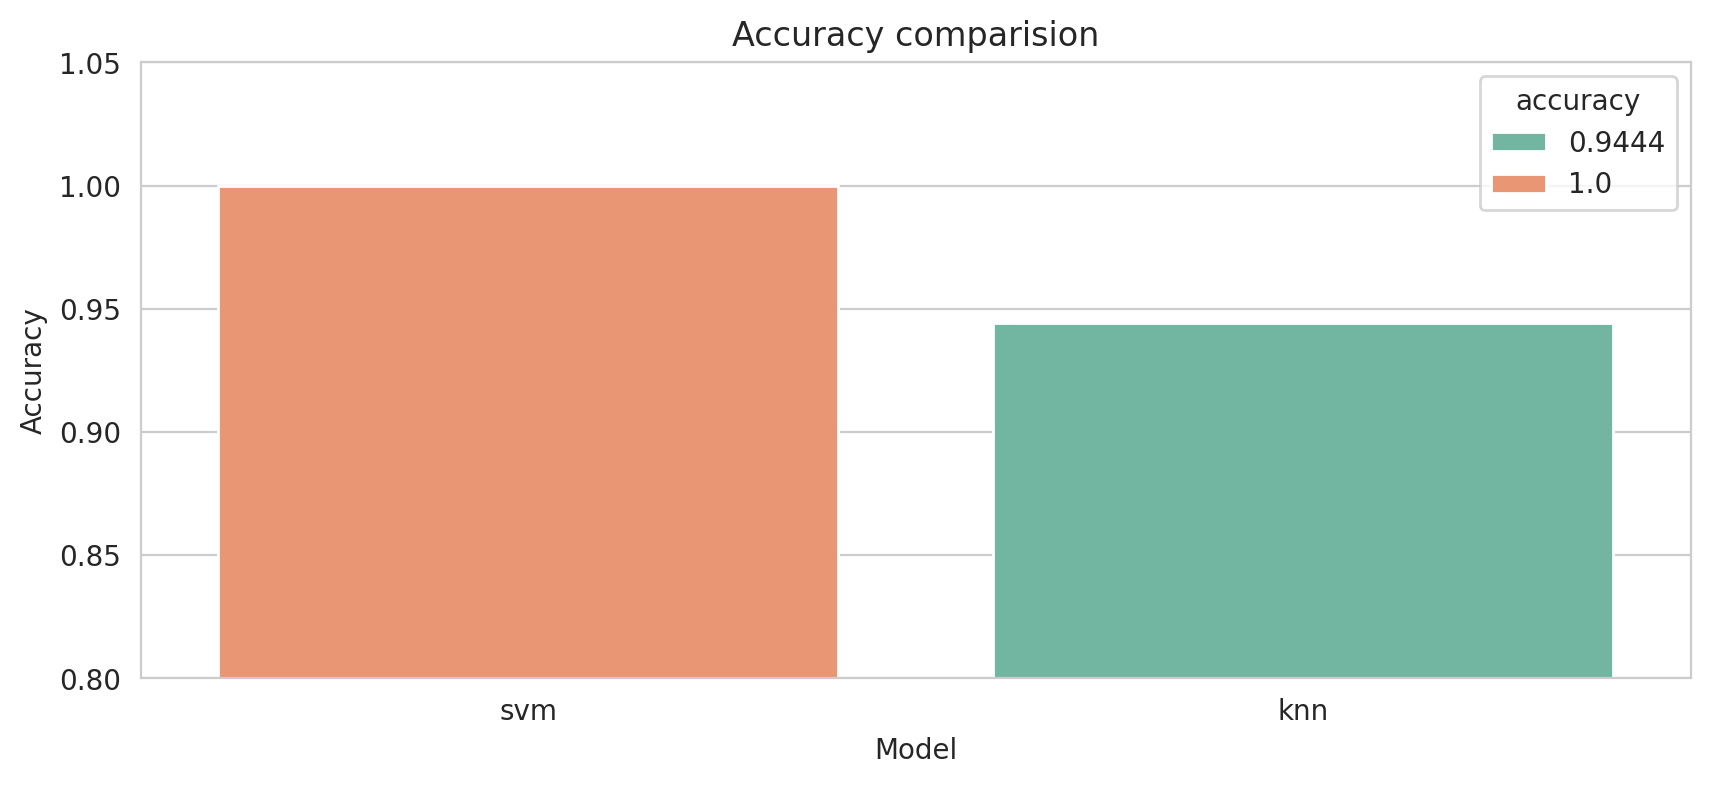

In [25]:
# accuracy comparision

acc_df = pd.DataFrame.from_dict(
    data=scaled_accuracies, orient="index", columns=["accuracy"]
)

plt.figure(figsize=(10, 4), dpi=200)

with sns.axes_style("whitegrid"):
    sns.barplot(
        data=acc_df, x=acc_df.index, y="accuracy", palette="Set2", hue="accuracy"
    )

plt.title("Accuracy comparision")
plt.xlabel("Model")
plt.ylabel("Accuracy")

plt.ylim(0.8, 1.05)
plt.show()

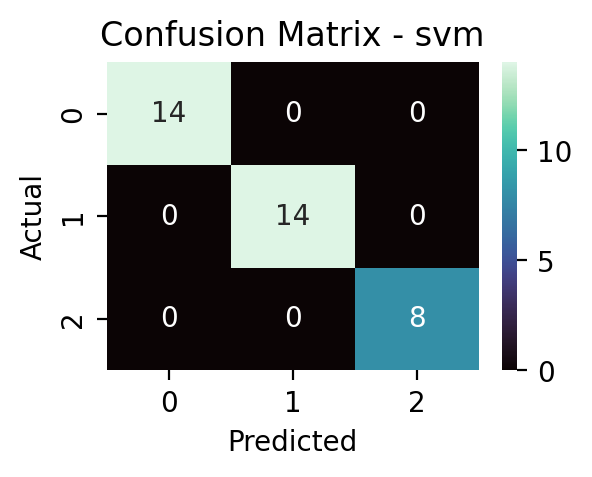

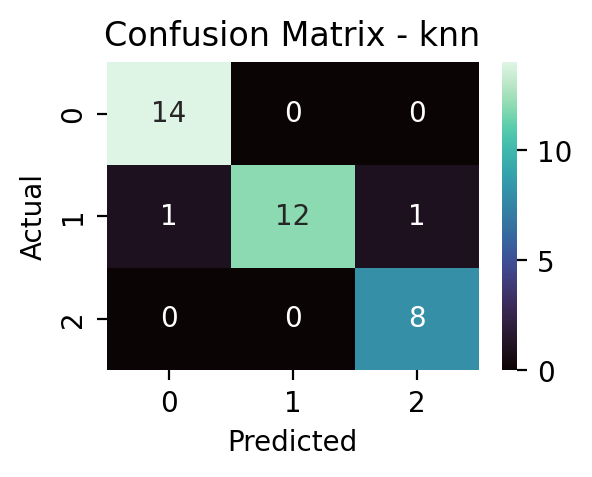

In [26]:
# confusion matrixes

for name, cm in scaled_matrices.items():
    plt.figure(figsize=(3, 2), dpi=200)

    sns.heatmap(data=cm, annot=True, fmt="d", cmap="mako")

    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")

    plt.show()

## 🧪 Sample prediction


In [27]:
sample_data = {
    "alcohol": 13.97,
    "malic_acid": 5.61,
    "ash": 2.39,
    "alcalinity_of_ash": 16.1,
    "magnesium": 98.0,
    "total_phenols": 2.90,
    "flavanoids": 0.62,
    "nonflavanoid_phenols": 0.55,
    "proanthocyanins": 1.32,
    "color_intensity": 5.72,
    "hue": 0.64,
    "od280/od315_of_diluted_wines": 2.52,
    "proline": 751.0,
}

sample_data_df = pd.DataFrame([sample_data])

sample_data_scaled = scaler.transform(sample_data_df)

sample_data_pred_svm = models["svm"].predict(sample_data_scaled)
sample_data_pred_knn = models["knn"].predict(sample_data_scaled)

print("SVM Prediction:", sample_data_pred_svm[0])
print("KNN Prediction:", sample_data_pred_knn[0])

SVM Prediction: 2
KNN Prediction: 2


## ✅ Save the models and scaler (preprocessor)


In [28]:
pipeline = {
    "svm": models["svm"],
    "knn": models["knn"],
    "scaler": scaler,
}

joblib.dump(pipeline, "pipeline.pkl")

['pipeline.pkl']